In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..','..','..')))
import pandas as pd
import numpy as np

import pudl
from pudl.settings import SETTINGS
import pudl.constants as pc
from pudl.output.pudltabl import PudlTabl

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,4)
mpl.rcParams['figure.dpi'] = 150
pd.options.display.max_columns = 56

In [4]:
pudl_out = PudlTabl(freq='MS', start_date='2016-01-01', end_date='2016-12-31')

In [5]:
mcoe_out = pudl_out.mcoe()

/home/zane/anaconda3/envs/pudl/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
mcoe_out.to_csv('pudl_mcoe_for_rmi_2016.csv', index=False)

In [7]:
mcoe_out.fuel_type_code_pudl.unique()

array(['gas', 'coal', 'oil', 'waste'], dtype=object)

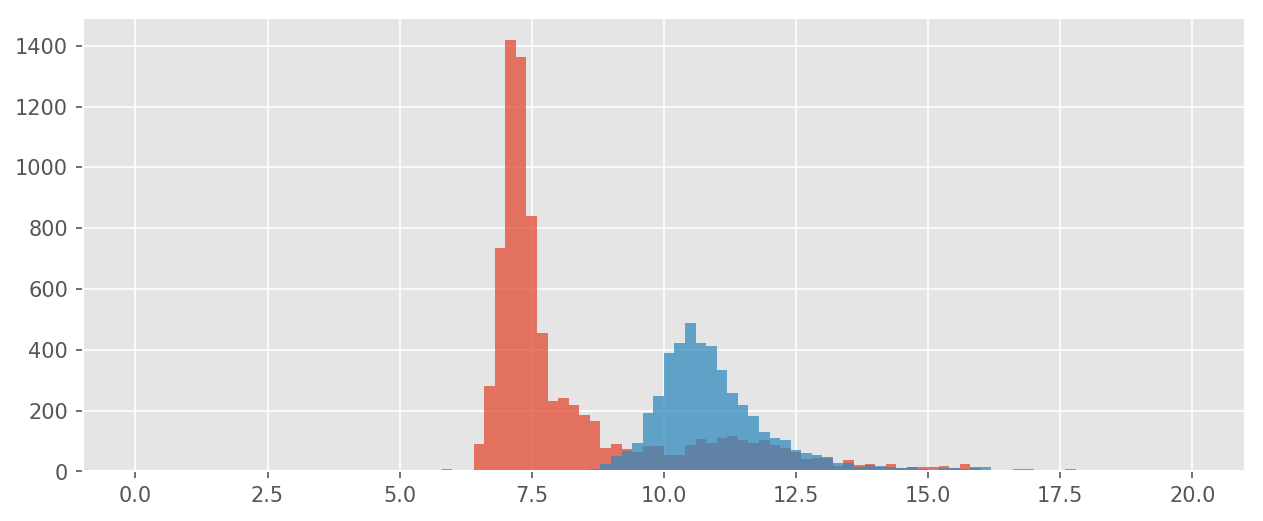

In [8]:
gas_hr = mcoe_out[(mcoe_out.fuel_type_code_pudl=='gas')]
coal_hr = mcoe_out[(mcoe_out.fuel_type_code_pudl=='coal')]
plt.hist(gas_hr.heat_rate_mmbtu_mwh, bins=100, range=(0,20), alpha=0.75)
plt.hist(coal_hr.heat_rate_mmbtu_mwh, bins=100, range=(0,20), alpha=0.75)
plt.show();

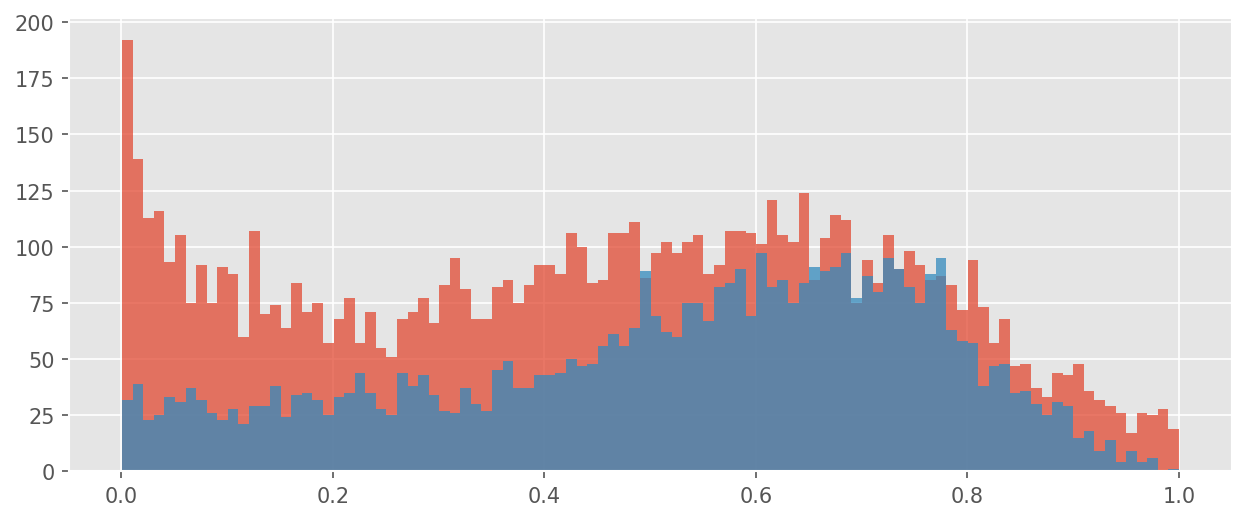

In [9]:
plt.hist(gas_hr.capacity_factor, bins=100, range=(0.001,1), alpha=0.75)
plt.hist(coal_hr.capacity_factor, bins=100, range=(0.001,1), alpha=0.75)
plt.show()

In [14]:
pudl_engine = pudl.init.connect_db()
epacems = pd.read_sql('select * from hourly_emissions_epacems', pudl_engine)

In [16]:
epacems.sample(10)

,id,state,plant_name,plant_id_eia,unitid,operating_datetime,operating_time_interval,gross_load_mw,steam_load_1000_lbs,so2_mass_lbs,so2_mass_measurement_code,nox_rate_lbs_mmbtu,nox_rate_measurement_code,nox_mass_lbs,nox_mass_measurement_code,co2_mass_tons,co2_mass_measurement_code,heat_content_mmbtu,facility_id,unit_id_epa
3540919,3540916,CO,Fountain Valley Combustion Turbine,55453,1,2007-10-30 03:00:00,00:31:48,14.0,NaN,0.062,Measured,0.109,Measured,11.311,Calculated,6.148,Undetermined,103.774,NaN,NaN
5083157,5083110,CO,Rocky Mountain Energy Center,55835,2,2010-06-17 05:00:00,01:00:00,177.0,NaN,0.800,Measured,0.008,Measured,10.673,Calculated,79.300,Measured,1334.100,7584.0,10174.0
7119438,7119438,CO,Brush Power Projects,10682,GT2,2013-09-14 05:00:00,00:00:00,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,1117.0,3576.0
7408453,7408395,CO,Pueblo Airport Generating Station,56998,CT01,2014-02-26 02:00:00,00:00:00,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,8289.0,90496.0
916545,916546,CO,Cherokee,469,2,2002-08-14 09:00:00,00:00:00,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,NaN
6292083,6292084,CO,Lamar,508,8,2012-06-19 03:00:00,00:00:00,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,7393.0,89621.0
2564330,2564291,CO,Fountain Valley Power Plant,55453,5,2005-11-01 10:00:00,00:00:00,NaN,NaN,NaN,None,NaN,None,NaN,None,NaN,None,NaN,1493.0,4794.0
3676722,3676723,CO,Frank Knutson Station,55505,BR1,2008-01-14 18:00:00,01:00:00,55.0,NaN,0.404,Measured,0.026,Measured,17.495,Calculated,40.000,Undetermined,672.900,NaN,NaN
3545733,3545734,CO,Front Range Power Plant,55283,1,2007-10-13 21:00:00,01:00:00,155.0,NaN,0.698,Measured,0.024,Measured,27.907,Calculated,69.100,Undetermined,1162.800,NaN,NaN
5163052,5163042,CO,Rawhide Energy Station,6761,D,2010-08-02 17:00:00,01:00:00,48.0,NaN,0.382,Measured,0.031,Measured,19.722,Calculated,37.800,Measured,636.200,875.0,89476.0
